# EOF on CNTL

## import package

In [31]:
import sys
import numpy as np
import netCDF4 as nc
import joblib 

from matplotlib import pyplot as plt
from scipy.interpolate import interp1d

sys.path.append('/home/b11209013/Package')
import SignalProcess as sp # type: ignore

## load data

In [32]:
fname = '/work/b11209013/MPAS/merged_data/CNTL/q1.nc'

with nc.Dataset(fname, 'r', mmap=True) as f:
    lat = f.variables['lat'][:]
    lon = f.variables['lon'][:]
    lev = f.variables['lev'][:]
    time = f.variables['time'][:]
    
    lat_lim = np.where((lat >= -5) & (lat <= 5))[0]

    lat = lat[lat_lim]
    q1 = f.variables['q1'][:, :, lat_lim, :]

q1 = q1 - np.mean(q1)

ltime, llev, llat, llon = q1.shape

## reshape and interpolate

### permute and reshape

In [33]:
q1_pm = q1.transpose((1, 0, 2, 3))
q1_rs = q1_pm.reshape((llev, -1))

### interpolate data

In [34]:
lev_itp = np.linspace(150, 1000, 18)

q1_itp = interp1d(lev[::-1], q1_rs[::-1], axis=0)(lev_itp)

## Compute EOF structure

In [35]:
e = sp.EOF(q1_itp)

exp_var, q1_eof, q1_pc = e.EmpOrthFunc()

## plot out the EOF structure

(1000.0, 150.0)

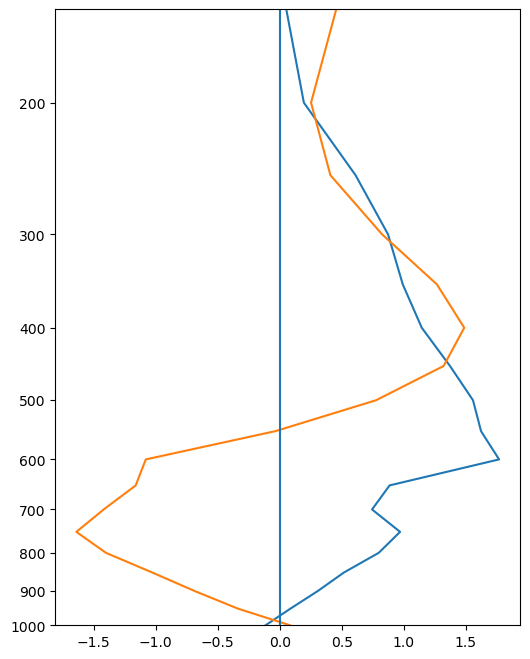

In [36]:
plt.figure(figsize=(6, 8))

plt.plot(q1_eof[:, 0], lev_itp, label='EOF1')
plt.plot(q1_eof[:, 1], lev_itp, label='EOF2')
plt.yscale('log')
plt.yticks([200, 300, 400, 500, 600, 700, 800, 900, 1000], [200, 300, 400, 500, 600, 700, 800, 900, 1000])
plt.axvline(0)
plt.ylim(1000, 150)

## save as pickle file

In [37]:
joblib.dump(q1_eof, 'CNTL_EOF.joblib')

['CNTL_EOF.joblib']